# Chapter 2 
> Linear Algebra and Machine Learning

## Lecture 9
___

### Review of Linear Algebra

Reference Books: Matrix Cookbook by Kaare Brandt Petersen & Michael Syskind Pedersen, 2012



$A \in \mathbb{R}^{n \times m}, n\text{ rows and } m\text{ columns}$ 

range($A$):=span{\underline{a}$_1$,...,\underline{a}$_m$}

null($A$):={\underline{x} $\in \mathbb{R}^{m}$|$A$\underline{x}=0}

Column rank = Row rank = number of linearly independent vectors.

Full rank: rank(A) = min{m,n}.

A \textbf{nonsingular} or \textbf{ invertible} matrix is a square matrix of full rank

Angle between two vectors: $\displaystyle \alpha = cos^{-1}(\frac{\mathbf{x}^T\mathbf{y}}{||\mathbf{x}||\cdot ||\mathbf{y}|| })$

$Q$ matrix is \textbf{ unitary} or \textbf{ orthogonal} if $Q^T=Q^{-1}$:
$||Q\mathbf{x}||=||\mathbf{x}||$ rotation

\textbf{ Norms}:

$\displaystyle ||\mathbf{x}||_p:=(\sum_{j=1}^n|\mathbf{x}_j|^p)^{1/p}$

$\displaystyle ||\mathbf{x}||_1:=\sum_{j=1}^n|\mathbf{x}_j|$

$\displaystyle ||\mathbf{x}||_2:=(\mathbf{x}^T\mathbf{x})^{1/2}$

$\displaystyle ||\mathbf{x}||_\infty:=\max_{1\le j\le n}|\mathbf{x}_j|$

$\displaystyle 
||A||_{(m,n)}:=\sup_{x\in \mathbf{R}^m, \mathbf{x} \ne 0}\frac{||A\mathbf{x}||_n}{||\mathbf{x}||_m}=\sup_{||\mathbf{x}||_m=1}||A\mathbf{x}||_n$

$\displaystyle ||A||_1 = \text{ max column in } A$ <br>
$\displaystyle ||A||_\infty = \text{ max row in } A$

Frobenins (Hilbert-Schmidt norm): 

$\displaystyle ||A||_F = (\sum_{i=1}^n\sum_{j=1}^m |a_{i,j}|^2)^{1/2}=\sqrt{\text{ Tr}(A^TA)}=\sqrt{\text{Tr}(AA^T)}\text{ , where Tr}(B) = \sum_j b_{jj}, \text{ sum of diagonal entries.}$

$||QA||_2=||A||_2 \,\&\, ||QA||_F=||A||_F $

\textbf{Singular Value Decomposition} (SVD): rotation & stretching of a basis

$U$ - left singular matrix, $V$- right singular matrix, $\Sigma$ is the diagonal entry matrix.



\begin{align}
\text{To find the } V, \text{we note that } A^TA &= V\Sigma U^{-1}U\Sigma V^T \\
& = V\Sigma^2V^T \\
&= V\left[ 
\begin{array}{ccc}
\sigma_1^2 &  & \\
& \sigma_2^2 &  \\
& & ... \\
& & \sigma_n^2  \\
\end{array}
\right]V^T
\end{align}

The eigenvectors of this matrix $A^TA$ will give us the vectors $\mathbf{v}_i$, and the eigenvalues will give the numbers $\sigma_i$. 

Similarly, the matrix $AA^T$ gives us info for $U$. Examples can be seen here [SVD examples](
https://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/positive-definite-matrices-and-applications/singular-value-decomposition/MIT18_06SCF11_Ses3.5sum.pdf#:~:text=The%20singular%20value%20decomposition%20of%20a%20matrix%20is,its%20eigenvectors%20are%20orthogonal%20and%20we%20can%20write)

<div>
<img src="./images/Screenshot%202022-02-04%20162022.jpg" width="500"/>
</div>

## Lecture 10
___

### PCA (principal component analysis)

$\overline{x} $ center data by subtraction the mean

$\frac{1}{N-1}XX^T$ is simply the empirical approximation to Cov(X) which henceforth we denote as $C_x$. $C_x$ is non-negative definite & Symmetric (NDS). Hence it has an eigen decomposition $C_x = Q\Lambda Q^T$. The eigen-vectors of $C_x$ are called the principal components or the Rarhumen-Loere modes or PCA modes of $C_x$.

At the same time write $X=U\Sigma V^T$ then, 
\begin{align}
C_x=\frac{1}{N-1}XX^T&=\frac{1}{N-1}U\Sigma V^TV\Sigma U^T\\
&=\frac{1}{N-1}U\Sigma^2U^T
\end{align}


Thus, columns of U,\textbf{ the left singular vectors of X are precisely the Principal Components of} $C_x$

But why do we care about the PCA?

A random varibale is called Gaussian if its PDF has the form 
$$\Pi(x)=\frac{1}{\sqrt{(2\pi)^ddet(C)}}exp(-\frac{1}{2}(x-m)^TC^{-1}(x-m))$$, where m is mean

\begin{lemma}
Suppose $x \sim \mathcal{N}(m,C),m \in \mathbb{R}^d, C\in \mathbb{R}^{d\times{d}}. \text{ Let } b\in \mathbb{R}^n \& A\in \mathbb{R}^{n\times d} \text{ then } z=Ax+b \text{ is also Gaussian & } z\in \mathcal{N}(b+Am, ACA^T)  $
\end{lemma}

PCA explains the covariance and directions of maximum singular values in our dataset. It is good for low-dimension compression. 


## Lecture 11
___
### From PCA & SVD to Proper Orthogonal Decomposition & Dynamic Mode Decoposition

POD(proper orthogonal decomposition)

$\displaystyle f(x,t):=\sum_{k=0}^{\infty}c_k(t)\psi_k(x)$

In the context, $\psi_k(x)$ are called the POD modes & $c_k(t)$ are called the POD coefficient. Luckily, there is an easy way to compute POD using SVD.

Suppose dynamics of f(x,t) are observed over u discrete set, ie (x_j,t_k) ,j=0...N-1, k=0,...,T-1. Now put it into a matrix D:

$$D:=\begin{bmatrix} 
\\
	d_0=f(x_j,t_0) \;\; | \;\; d_1=f(x_j,t_1) \;\; | \;\; ....\;\; |\;\; d_{T-1}=f(x_j,t_{T-1})\\
    \\
	\end{bmatrix}$$
    
Then, compute the SVD of D.

$D=U\Sigma V^T$, $U$ doesn't change even if the matrix is shuffled around, the direction of time is not important. Then the columns of $U$ are precisely the POD modes & the rows of $\Sigma V^T$ are precisely the POD coefficients.

\textbf{ The power of this method is also important that it could be used to predict the future behavior based on the DMD}. Book:Data-Driven Science and Engineering by Steven



In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#
# first load frames of cylinder flow simulation
#from google.colab import drive
# drive.mount('/content/drive')
#
data = np.load(
    "/content/drive/MyDrive/Courses/AMATH482582-WIN2022/Notebooks/CylData/cyldata.npy")
Nx = 200
Ny = 50

In [ ]:
# ax0 is the flattened frames and ax1 are the time frames

# compute svd of data

import numpy.matlib as matlib

mean_data = np.mean(data, 1)

centered_data = data - np.transpose(matlib.repmat(mean_data, 200, 1))

dU, ds, dVt = np.linalg.svd(centered_data, full_matrices=False)

In [ ]:
# plot some of the singular values and some of the principal modes


fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(np.log(ds[0:100]))
ax.set_xlabel('index $j$')
ax.set_ylabel('$\log(\sigma_j)$')
#ax.set_xlim(0, 150)


fig, ax = plt.subplots(8, 2, figsize=(20, 20))

for j in range(8):

    ax[j][0].imshow(np.reshape(dU[:, j], (Ny, Nx)), cmap='bwr')
    ax[j][0].get_xaxis().set_visible(False)
    ax[j][0].get_yaxis().set_visible(False)
    ax[j][0].set_aspect('equal')

    ax[j][1].plot(np.abs(dVt[j, :]))
    ax[j][1].set_xlabel('Time step')

    if j == 0:
        ax[j][0].set_title('POD Modes', fontsize=30)
        ax[j][1].set_title('|POD Coeff.|', fontsize=30)

plt.show()

In [ ]:
# approximate the dynamics using the POD modes only keeping the first 40 and compare to original data.

dss = np.copy(ds)

dss[10:None] = 0

# low rank approx
approx_centered_data = np.dot(dU, np.dot(np.diag(dss), dVt))

print(approx_centered_data.shape)

# add the mean back
approx_data = approx_centered_data + \
    np.transpose(matlib.repmat(mean_data, 200, 1))

In [ ]:
# side by side comparison of original and approximate dynamics

fig, ax = plt.subplots(4, 2, figsize=(20, 15))

frm_indx = [10, 100, 150, 199]

for j in range(4):

    ax[j][0].imshow(np.reshape(data[:, frm_indx[j]], (Ny, Nx)), cmap='bwr')
    ax[j][0].get_xaxis().set_visible(False)
    ax[j][0].get_yaxis().set_visible(False)
    ax[j][0].set_aspect('equal')

    ax[j][1].imshow(np.reshape(
        approx_data[:, frm_indx[j]], (Ny, Nx)), cmap='bwr')
    ax[j][1].get_xaxis().set_visible(False)
    ax[j][1].get_yaxis().set_visible(False)
    ax[j][1].set_aspect('equal')

    if j == 0:
        ax[j][0].set_title('Original', fontsize=30)
        ax[j][1].set_title('POD Approximation', fontsize=30)

### DMD (Dynamic Modes Decomposition) - developed 2010s, some work done at UW:

Look back to the POD, the POD modes are smooth & structured, the POD coefficients are rough & chaotic. This is because POD only sees spatial structure & ignores temporal dynamics. DMD attempts to address this issue by modeling the dynamics of the data:

$$d_{k+1}=Ad_k$$
$$f(x,t_{k+1}){\leftarrow}A\leftarrow f(x,t_k)$$

Lets reconstruct our data as follows, one keeping the T-1 data from 0 to T-2, the other keeping the T-1 data from 1 to T-1.

$$D_1:=\begin{bmatrix} 
\\
	d_0 \;\; | \;\; d_1\;\; | \;\; ....\;\; |\;\; d_{T-2}\\
    \\
	\end{bmatrix}$$

$$D_2:=\begin{bmatrix} 
\\
	d_1 \;\; | \;\; d_2\;\; | \;\; ....\;\; |\;\; d_{T-1}\\
    \\
	\end{bmatrix}$$
    
Then DMD seeks to find a matrix $A$ such that 
$$D_2 \approx AD_1 $$

This approx is then done in a best-fit 


$$A=\min_{B\in \mathbb{R}^{N\times N},\text{ rank(B)}\le r}||BD_1-D_2||_F^2$$

So what does DMD actually do?

\begin{align}
d_k&=Ad_{k-1}=A(Ad_{k-2})=...\\
d_k&=A^{k-1}d_0=Q\Lambda^{k-1}Q^{-1}d_0 \\
&=Q\Lambda^{k-1}b=\sum_{j=1}^rq_{j}\lambda_{j}^{k-1}b_j
\end{align}

In [ ]:
from pydmd import DMD

In [ ]:
# first we create a DMD object
dmd = DMD(svd_rank=10)  # a rank 10 approximation to the dynamic matrix A

# simply pass centered data set of snapshots to the dmd class
dmd.fit(centered_data)

dmd.plot_eigs(show_axes=True)

In [ ]:
# now plot the DMD modes and the temporal dynamics as we did for POD

fig, ax = plt.subplots(8, 4, figsize=(30, 18))

for j in range(8):

    ax[j][0].imshow(np.reshape(np.real(dmd.modes[:, j]), (Ny, Nx)), cmap='bwr')
    ax[j][0].get_xaxis().set_visible(False)
    ax[j][0].get_yaxis().set_visible(False)
    ax[j][0].set_aspect('equal')

    ax[j][1].plot(np.real(dmd.dynamics[j, :]))
    ax[j][1].set_xlabel('Time step')

    ax[j][2].imshow(np.reshape(np.imag(dmd.modes[:, j]), (Ny, Nx)), cmap='bwr')
    ax[j][2].get_xaxis().set_visible(False)
    ax[j][2].get_yaxis().set_visible(False)
    ax[j][2].set_aspect('equal')

    ax[j][3].plot(np.imag(dmd.dynamics[j, :]))
    ax[j][3].set_xlabel('Time step')

    if j == 0:
        ax[j][0].set_title('Real DMD Modes', fontsize=30)
        ax[j][1].set_title('Real DMD Dynamics', fontsize=30)
        ax[j][2].set_title('Imag DMD Modes', fontsize=30)
        ax[j][3].set_title('Imag DMD Dynamics', fontsize=30)


plt.show()

 ## Lecture 12
 ___
 ### Introduction to Machine Learning
 
 Book: The Elements of Statistical Learning by Hastie
 
 

\textbf{Supervised Learning}: With labels.
Predict/classify data given a training dataset. Eg: REgression, classification, function approximation, etc.

\textbf{Un-supervised Learning}:
No labels.
Find meaningful structure in dataset. Eg: Clustering, dimensionality reduction, Generation modeling.

### Supervised Learning

The function model assumes there exists a function
$\displaystyle f^+:X\rightarrow y$ so that $y_i=f^+(x_j)+\epsilon_j$, where $\epsilon_j$ are some noise that may be in the output or our observation of the $f^+(x_j)$

By far the most common assumption is Gaussian noise 

$$\epsilon_j \approx \mathcal{N}(0,\sigma^2)$$

This implies $\displaystyle y_i|x_j \approx \mathcal{N}(f^+(x_j),\sigma^2)$ 

$$\Pi(y_j|x_j)\propto exp(-\frac{1}{2\sigma^2}|f^+(x_j)-y_j|^2)$$, $\Pi$ is the PDF of $y$ for fixed $x_j$

For Euclidern norm, this is called a maximum likelihood estimate (MLE):

$$f_{MLE}=arg\min_f \frac{1}{2\sigma^2}||f(X)-Y||^2$$

At this moment, it is useless without a model, since there are many solutions. One of the most simple model is \textbf{ linear regression}.

$$f_{MLE}\equiv\beta_{MLE}=argmin \frac{1}{2\sigma^2}||A\beta-Y||^2$$, where A=$
\left[
\begin{array}{ccc}
1& & x_0^T \\
.& & . \\
.& & . \\
1& & x_{N-1}^T
\end{array}
\right]
$.

Therefore, MLE is nothing but a least square solution to the problem. Typically, the system is over-determined. Solution is given by solving the normal equations,

$$\frac{\partial}{\partial\beta}(\frac{1}{2\sigma^2}(A\beta-y)^T(A\beta-y))=\frac{1}{\sigma^2}A^T(A\beta-y)=0$$

\begin{align}\implies A^T(A\beta-y)&=0\\
\beta&=(A^TA)^{-1}A^Ty
\end{align}



## Lecture 13
___
### Evaluating SL models

\textbf{ Regularization/penalization/shrinkage}:
we consider $\displaystyle \hat{\beta}=argmin \frac{1}{2\sigma^2}||A\beta-y||^2+\frac{\lambda}{2}||\beta||_p^p$

$\lambda\ge 0$ is called the regularization/penalty parameter & $p \ge 1$ denotes the choice. $p=2 $ for Ridge regression. 

$$\beta=(\frac{1}{\sigma^2}A^TA+\lambda I)^{-1}A^Ty$$

So doing SVD of A,

$$\frac{1}{\sigma^2}A^TA+\lambda I=V(\frac{1}{\sigma^2}\Sigma^2+ \lambda I)V^T$$, the diagonals are non-negative, eliminating zeros so A matrix can be invertible.

Again, the choice of $\lambda$ is important for stability and accuracy.

### Training & Testing Errors

\textbf{Training mean squared error (MSE)}

${X,Y}$ - training set, used to find $\hat{f}(\equiv \hat{\beta})$

${X',Y'}$ - testing set, used for validation.

Analyzing the MSE doesn't mean which model is always better. It is still important for choice of $\lambda$


## Lecture 14
___

### Model tuning with Cross Validation

$\lambda$ too small, the model is basically memorizing all the train data. The test error is large. (over-fitting, high-variance)

$\lambda $ too large, model is too simply biased.()

We want the best test error which is the smallest. However, in real life, we don't know the test error.

\textbf{Cross Validation}: Split the train data to k parts, or k-fold.

Randomly permute the data pairs-- $\mathbf{x}=\{x_{10},x_{-1},...,x{_13}\}$ and responding $\mathbf{y}$. 

Then split the data $\mathbf{x} \,\&\, \mathbf{y} $ into K-subsets. Iterate over $k=0,...k=K-1$ and fit the model to the training data with the k-th fold removed. 

Finally, calculate the CV prediction error (CV cost) with changing $\lambda$

$$CV(\hat{f},\lambda) := \frac{1}{N}\sum_{k=0}^{K-1}||\hat{f}(\mathbf{x}_k,\lambda)-\mathbf{y}_k||^2$$



## Lecture 15
___
### Introduction to Kernel Methods

\textbf{Kernel NDS}: We say K is non-negative definite & symmetric (NDS) if 

\begin{itemize}
\item $K(\mathbf{x},\mathbf{x'})=K(\mathbf{x'},\mathbf{x})$
\item For any set of points $(x_0,...x_n)$, the matrix 
$(K)_{ij}=K(x_i,x_j) $ is NDS.
\item $\displaystyle K(\mathbf{x},\mathbf{x'})=\sum_{j=0}^\infty\lambda_j\psi_j(\mathbf{x})\psi_j(\mathbf{x'}) \text{, the number }\lambda_j\ge 0 $ are the eigenvalues, while the $\psi_j$ are eigenfunctions.

\end{itemize}

Mercer Theorem says if a matrix $A$ is NDS then $A=Q\Lambda Q^{-1}$

$$\implies A=\sum_j\lambda_jq_jq_j^T$$

Define the functions,

$$F_j(x)=\sqrt{\lambda_j}\psi_j(x)$$

along with the mapping,

$$F(\mathbf{x})=(F_0(\mathbf{x}),F_1(\mathbf{x}),....)$$

Functions in RKHS(Reproducing Kernel to Hilbert Space) have the nice properties:

$\displaystyle K (\mathbf{x},\mathbf{x'})=\sum_j F_j(\mathbf{x})F_j(\mathbf{x'}) \,\&\, \text{ so, for a fixed }\mathbf{x}$ we have that $\displaystyle f(\mathbf{x})=\sum_j c_jF_j(\mathbf{x})=(\{c_j\}_{j=0}^\infty,\{F_j(\mathbf{x})\}_{j=0}^\infty)_{l^2}=<f,K(\mathbf{x},)>_{H_k}$

### Kernel Interpolation
Suppose we have an interpolation problem, given x datapoints and y datapoints. we wish to find $\displaystyle f=\sum_{j=0}^\infty c_jF_j$ so we need to solve $\displaystyle \sum_{j=0}^\infty c_jF_j（x_i)=y_i, i=0,...,N-1$ We want the solution with minimized $H_k$ norm. Therefore, we wish to have 

$$minimize \sum_{j=0}^\infty c_j^2$$

$$s.t \sum_{j=0}^\infty c_jF_j(x_i)=y_i$$

What it reduces to is a solution of the form 

$$f(\mathbf{x})=\sum_{j=0}^{N-1}a_jK(\mathbf{x_j},\mathbf{x})$$

The interpolation constraints then tell us that $\displaystyle \sum_{j=0}^{N-1}a_jK(\mathbf{x}_j,\mathbf{x}_i)=y_i$

\begin{align}
\quad\quad\quad\quad\quad\quad\quad\quad \mathbf{a}&=(a_0,....,a_{N-1})\\
\implies \Theta \mathbf{a}=\mathbf{y},\quad\quad\mathbf{y}&=(y_0,....y_{N-1}) \\\quad\quad \Theta_{ji}&=K(\mathbf{x}_j,\mathbf{x}_i)
\end{align}

Thus, $\mathbf{a}=\Theta^{-1}\mathbf{y}$, now the matrix is invertible provided that it is NDS, and the $x_j$ are distinct.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define function to be interpolated 

def f(x):

  val = np.exp( - x**2/0.05 )*np.cos(np.pi*20*x) + 0.5*np.tanh(5*(x - 0.5))

  return val

Text(0, 0.5, 'f(x)')

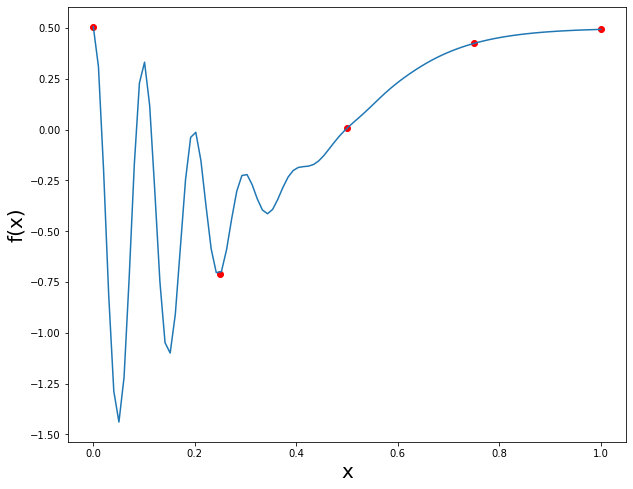

In [4]:
N = 100
N_p = 5

x = np.linspace(0,1, N) # grid used for plotting  

x_p = np.linspace(0,1, N_p) # set of points for interpolation

# plot the function 

fig,ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(x, f(x))
ax.scatter(x_p, f(x_p), color='r')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)

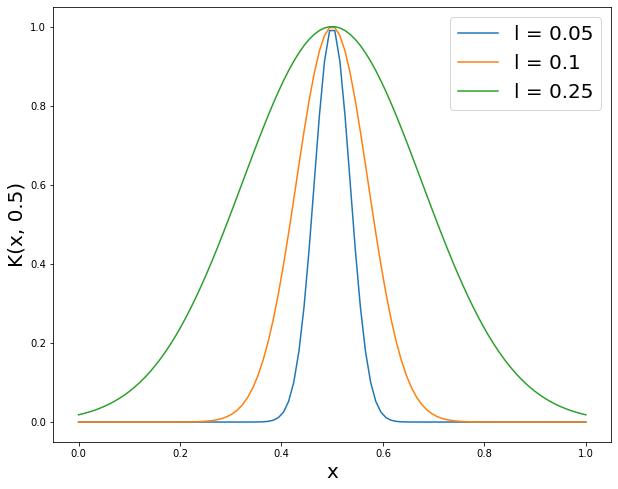

In [5]:
# define the kernel we wish to use 
# Gaussian Kernel

def K(x1, x2, l):

  val = np.exp( - (np.abs(x1 - x2)**2)/(l**2) )

  return val


# plot K(x, 0.5) for illustration 

l = [0.05, 0.1, 0.25]

fig,ax = plt.subplots(1,1, figsize=(10,8))

for i in range(3):
  
  ax.plot(x, K(x, 0.5, l[i]), label='l = '+str(l[i]))

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('K(x, 0.5)', fontsize=20)
plt.legend(fontsize=20)

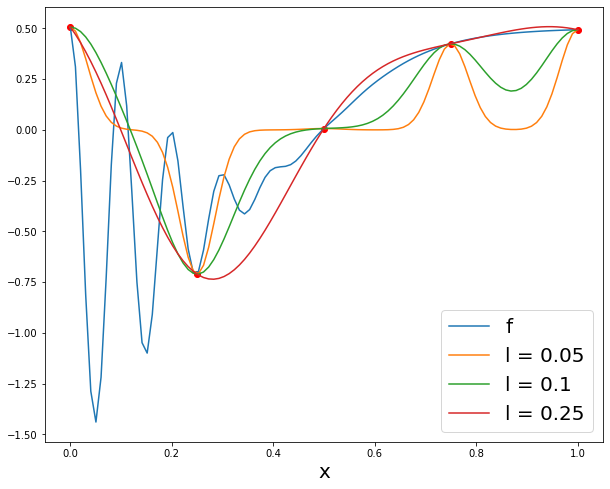

In [6]:
# compute kernel interpolands and plot them for each choice of l

# construct y vector, just for uniform notation with notes
y = f(x_p)

Theta = np.zeros( (N_p, N_p) )

fig,ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(x, f(x), label='f')

for i in range(3):
  # construct kernel matrix (maybe not the most efficient way but ok)
  for j in range(N_p):
    Theta[j,:] = K( x_p[j], x_p, l[i] )

  # compute kernel interpolant 

  a = np.linalg.solve(Theta, y)

  # plot the interpolant along with original function and interpolation data

  KV = np.zeros( (N_p, N) )

  for j in range(N_p):
    KV[j, :] = K( x_p[j], x, l[i] )

  f_interp = np.dot(a, KV)

  ax.plot(x, f_interp, label='l = ' + str(l[i]))


ax.scatter(x_p, y, color='r' )

ax.set_xlabel('x', fontsize=20)
plt.legend(fontsize=20)





## Lecture 16
___
### Kernel Ridge Regression 

Mercers Theorem:
$$K(\mathbf{x},\mathbf{x'})=\sum_{j=0}^\infty F_j(\mathbf{x})F_j(\mathbf{x'})$$
,where $F_j$ are the features of K, $F_j\rightarrow 0 \text{ as } j\rightarrow \infty$. This regression is capable of solving cases with infinite number of features but at the cost of constructing a finite $n\times n$ matrix. 

\textbf{Ridge Regression}: 
$$\min_{\beta}||A\beta-y||^2+\lambda||\beta||^2$$

where A is our feature matrix often of the form

$$A=\left[\begin{array}{ccc}
F_0(x_0) &F_1(x_1)&...\\
F_0(x_1) & F_1(x_1)&...\\
.. & .. \\
F_0(x_{N-1}) &F_1(x_{N-1})&..
\end{array}\right]$$

while we see $||f||^2_{H_k}=\sum_{j=0}^{J-1}\beta_j^2=||\beta||^2$

\textbf{Kernel Ridge Regression}:
$$\min_{f}||f(X)-Y||^2+\lambda||f||_{H_k}^2$$

\textbf{Representer Theorem}:
$$\hat{f}(\mathbf{x})=\sum_{n=0}^{N-1}\hat{a}_nK(\mathbf{x}_n,\mathbf{x})$$

,with $\hat{a}=(\hat{a}_0,...,\hat{a}_{N-1})$ being minimizer of 
$$minimize \;||\Theta\mathbf{a}-Y||^2+\lambda\mathbf{a}^T\Theta\mathbf{a}$$

The solution is found by differentiating it, and it is exactly $\displaystyle \mathbf{a}=(\Theta+\lambda I)^{-1}y$

### Example: House Pricing in Taiwan

Steps to do:

\begin{itemize}
\item Create corresponding train and test data.
\item Normalize the train and test data: (data-mean)/std
\item Choose and fit Kernel functions (example: "rbf"-Gaussian Kernel)
\item Create discrete $\lambda \text{ and } \gamma $ parameters. 
\item Double for-loop to calculate cross-validation scores (scoring="neg_mean_squared_error") and store the scores. 
\item Find the best score for choosing parameters
\item Predict
\end{itemize}


## Lecture 17
___
### Kernel Perspective vs. Feature Perspective

FR: $minimize \;||A\beta-Y||^2+\lambda||\beta||^2$ \\

KR: $minimize \; ||\Theta a-Y||^2 +\lambda a^T\Theta a$

where $A_{ij}=F_j(x_i)$ matrix of feature values,
$\Theta_{ij}=K(x_i.x_j)$

The size of computation is different in that, provided a large data set with data points far more than feature points, we might want to use FR because KR would generate a matrix of NXN dimension which costs too much.

For KR, we have infinite many features and more freedom to choose.

### Connecting Kernels to Fourier Series & Wavelets

From discrete Fourier Series we note that $\displaystyle f(t)=\sum_{k=-N/2}^{N/2-1}\hat{f}_kexp(ikt)$. We than identify a kernel called the \textbf{ Dirichlet Kernel}:
$$K(t,s)=\sum_{k=-N/2}^{N/2-1}exp(ik(t-s))$$
This gives the identity that 

$$\int_0^{2\pi}K(t,s)f(s)\,ds=\sum_{k=-N/2}^{N/2-1}\hat{f}_kexp(ikt)$$

Then, we also note that linear projection is not the only transformation, non-linear is also possible.



## Lecture 18
___
### Introduction to Clustering

\textbf{Clustering:} The unsupervised task of dividing the input data X into meaningful groups. Or, say the task of finding meaningful structures in X where we have no labels.

Split $X$ into $K$ clusters, $\displaystyle X=\bigcup_{k=0}^{K-1}C_k $ s.t. \quad $C_k\bigcap C_l= \emptyset$

\textbf{K-Means}:
\begin{itemize}
\item Choose $K\ge 0$
\item Choose centers $m_k,K=0...K-1$
\item Assign $x_i$ to cluster $C_k$ with center $m_k$
\end{itemize}


Sum of Squared error (SSE)$= \sum ||x_i-m_k||^2$, distance to center.

Choosing K such that $WSS(K)=\sum_{k=0}^{K-1}SSE(K)$ is not too large and not too small.





In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets

Text(0.5, 1.0, 'Input (Unlabelled) data')

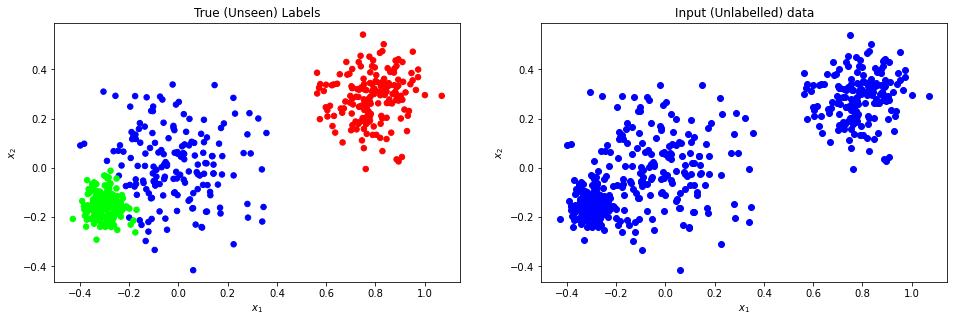

In [26]:
# generate a mixture model using sklearn's data generation function

N = 512 # total number of samples 

# X is our inoput data. The Y's are only used for plotting and assessment of accuracy 
X, Y = skl.datasets.make_blobs(n_samples=N, centers=[[0, 0], [.8,.3], [-0.3, -0.15]], cluster_std= [.15, 0.1, 0.05], n_features=2,random_state=0)

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')

In [27]:
# apply K-mean clustering to dataset to discover clusters 

import sklearn.cluster 

K = 4

KMM = skl.cluster.KMeans(n_clusters=K, random_state=0)

KMM.fit(X)

Y_pred = np.array(KMM.labels_, dtype=float) # predicted clusters by K-means



Text(0.5, 1.0, 'Predicted Labels with K= 4')

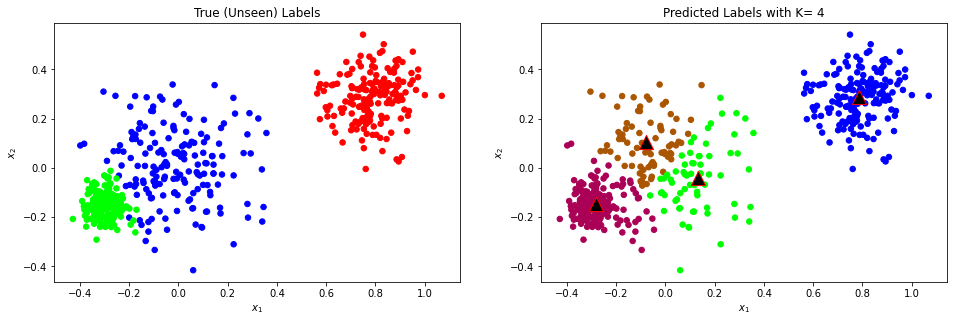

In [28]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], c=Y_pred, s= 30, cmap='brg')
ax[1].scatter(KMM.cluster_centers_[:,0], KMM.cluster_centers_[:,1], color='k', edgecolors='r', marker='^',  s= 200 )
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Predicted Labels with K= '+str(K))

Text(0.5, 1.0, 'Input (Unlabelled) data')

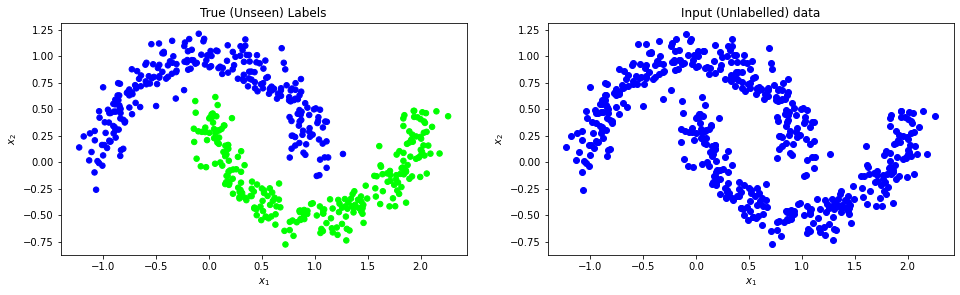

In [30]:
# K means on two moons

X_moon, Y_moon = skl.datasets.make_moons(n_samples=N, noise= 0.1, random_state=0)

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X_moon[:,0], X_moon[:,1], c=Y_moon, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X_moon[:,0], X_moon[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')


In [31]:
K=2

KMM_moon = skl.cluster.KMeans(n_clusters=K, random_state=0)

KMM_moon.fit(X_moon)

Y_moon_pred = np.array(KMM_moon.labels_, dtype=float) # predicted clusters by K-means




Text(0.5, 1.0, 'Predicted Labels with K= 2')

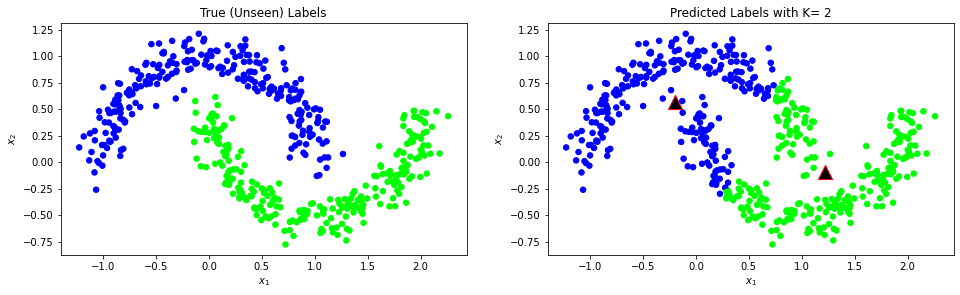

In [32]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X_moon[:,0], X_moon[:,1], c=Y_moon, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X_moon[:,0], X_moon[:,1], c=Y_moon_pred, s= 30, cmap='brg')
ax[1].scatter(KMM_moon.cluster_centers_[:,0], KMM_moon.cluster_centers_[:,1], color='k', edgecolors='r', marker='^',  s= 200 )
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Predicted Labels with K= '+str(K))

\textbf{Problems with K-means}:
Calculation of distance to center heavily depend on shape of cluster. The better the shape looks like circle or blocks, the better the K-mean results. For other shapes or geometry of data, K-mean fails badly sometimes.

<div>
<img src="./images/Screenshot%202022-02-20%20224414.jpg" width="500"/>
</div>

## Lecture 19
___
### Introduction to Graph Laplacians

\textbf{Similarity Graphs}: Consider our data set $X={x_1,...,x_{N-1}} \in \mathbb{R}^d \&$ asymmetric matrix $W\in \mathbb{R}^{N\times N}  $ with non-negative entries $w_{ij}\ge 0$ \\
We can then define a (weighted undirected graph $G={X,W}$), where the $X_j\in\mathbb{R}^d$ are the vertices of G & the entries $w_{ij}$ of W denote weights that are associated to edges that connect $x_i$ to $x_j$.

\begin{itemize}
\item If $w_{ij}=0$ for some $i,j$ then $x_i \;\&\; x_j$ are not connected by an edge
\item Since $W$ is symmetric then $w_{ij}=w_{ji}$, so the edge is not directed
\item The value of $w_{ij}$ represents the strength of the connection
\end{itemize}

<div>
<img src="./images/Sceenshot_1.PNG" width="500"/>
</div>


Now we consider a particular family of weighted graphs called \textbf{Proximity Graphs}: Let $\eta$ be a non-negative, non-increasing & continuous function (weight function), we then take $w_{ij}=\eta(||x_i-x_j||_p)$ for $1\le p\le \infty$

A typical example is simply to choose $\eta=exp(-\frac{t^2}{2\sigma^2})\;\&\; p=2$ which leads to $w_{ij}=exp(-\frac{||x_i-x_j||^2_2}{2\sigma^2})$

Another popular choice for $\eta$ is $\displaystyle \eta(t)=
\begin{cases}
0 & \text{ if } t\ge r\\
1 & \text{ if } t<r
\end{cases}
$
\begin{itemize}
\item Define the degree vector $\displaystyle d \in \mathbb{R}^N, \;\; d_j=\sum_{i=0}^{N-1}w_{ji}$, sum of rows of W.

\item Define the diagonal degree matrix $\displaystyle D=\text{diag}(d)$

\item Define the (Unnormalized) graph Laplacian $\tilde{L}=D-W$ 

\item As well as the normalized graph Laplacian $L=D^{-\frac{1}{2}}(D-W)D^{-\frac{1}{2}}=I-D^{-\frac{1}{2}}WD^{-\frac{1}{2}}$

\end{itemize}



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets
# generate a mixture model using sklearn's data generation function

N = 128 # total number of samples 

# X is our inoput data. The Y's are only used for plotting and assessment of accuracy 
X, Y = skl.datasets.make_blobs(n_samples=N, centers=[[0, 0], [.8,.3], [-0.3, -0.15]], cluster_std= [.15, 0.1, 0.05], n_features=2,random_state=0)

Text(0.5, 1.0, 'Input (Unlabelled) data')

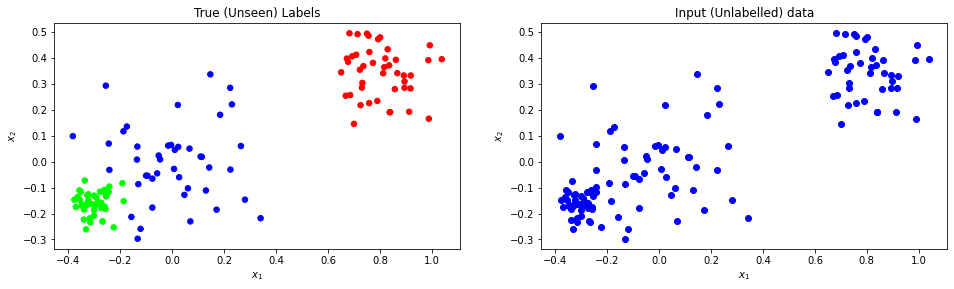

In [2]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')

In [7]:
# compute the weight matrix W for the vertices of our graph 

def eta(tt, rr):

  val = tt <= rr 

  return val.astype(float)



In [8]:
import scipy.spatial 

dist = scipy.spatial.distance_matrix( X, X, p =2)

r = 0.2

W = eta( dist, r)

In [9]:
# visualize the graph using NetworkX

import networkx as nx

G = nx.Graph()

for i in range(N):
  for j in range(N):
    if i != j and W[i,j] != 0 :
      G.add_edge(i, j, weight=W[i,j])

Text(0.5, 1.0, 'Proximity Graph')

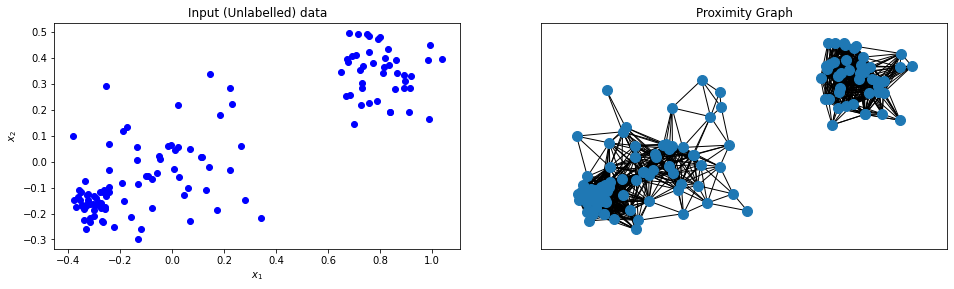

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], color='b')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('Input (Unlabelled) data')



nx.draw_networkx_nodes(G, X, node_size=100, ax = ax[1])
nx.draw_networkx_edges(G, X, ax = ax[1])
ax[1].set_aspect('equal')
ax[1].set_title('Proximity Graph')

Properties of Graph Laplacians:

\begin{itemize}
\item Both $L \;\&\; \tilde{L} $ are NDS. They have real and non-negative eigenvalues.$\\$
\item Both $L \;\&\; \tilde{L} $ have at least one zero eigenvalue, because 
$$\displaystyle \tilde{L}\mathbf{1}=(D-W)\mathbf{1}=\mathbf{d}-\mathbf{d}=0, \quad\mathbf{1}\text{ is the ones vector}.$$
$$L(D^{\frac{1}{2}}\mathbf{1})=D^{-\frac{1}{2}}\tilde{L}D^{-\frac{1}{2}}D^{\frac{1}{2}}\mathbf{1}=D^{-\frac{1}{2}}\tilde{L}\mathbf{1}=0$$
\item If $\mathbf{u}$ is an eigenvector of $\tilde{L}$ then $D^{\frac{1}{2}}\mathbf{u}$ solve the generalized eigenvalue problem 
$$L(D^{\frac{1}{2}}\mathbf{u})=\lambda D^{-1}(D^{\frac{1}{2}}\mathbf{u})$$
\item If the graph $G$ has $K$-disconnected components, then there will be $K$ zero eigenvalues.
<div>
<img src="./images/Sceenshot_2.PNG" width="500"/>
<img src="./images/Sceenshot_3.PNG" width="500"/>    
</div>
\end{itemize}


## Lecture 20
___
### Spectral Clustering 



In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets

Text(0.5, 1.0, 'Input (Unlabelled) data')

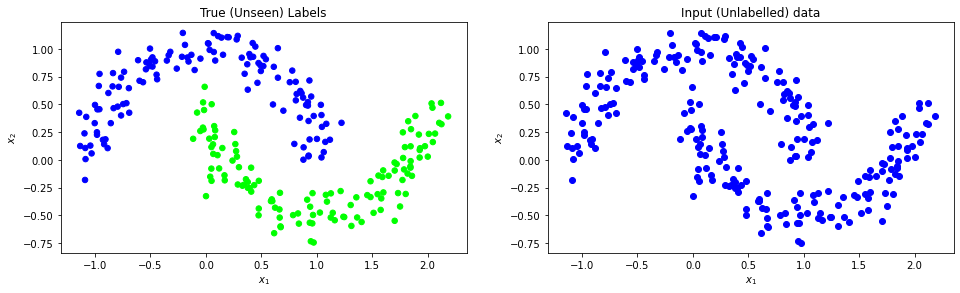

In [37]:
# generate a mixture model using sklearn's data generation function

N = 256 # total number of samples 

# K means on two moons

X, Y = skl.datasets.make_moons(n_samples=N, noise= 0.1, random_state=0)

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')


In [38]:
# compute the weight matrix W for the vertices of our graph 

def eta(tt, rr):

  val = tt <= rr 

  return val.astype(float)

#def eta(tt, rr):

#  val = np.exp( - (tt**2)/(2*rr**2) ) 
  
#  return val.astype(float)



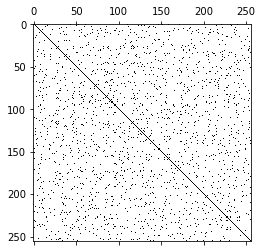

In [39]:
import scipy.spatial 

dist = scipy.spatial.distance_matrix( X, X, p =2)

r = 0.2

W = eta( dist, r)

plt.spy(W>=0.01)

In [40]:
# visualize the graph using NetworkX

import networkx as nx

G = nx.Graph()

for i in range(N):
  for j in range(N):
    if i != j and W[i,j] != 0 :
      G.add_edge(i, j, weight=W[i,j])

Text(0.5, 1.0, 'Proximity Graph')

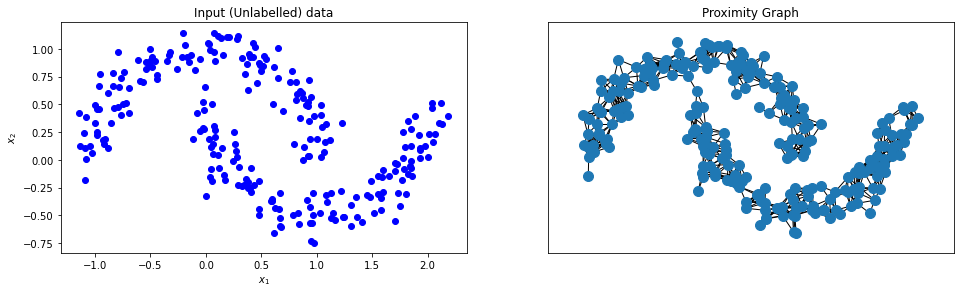

In [41]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], color='b')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('Input (Unlabelled) data')



nx.draw_networkx_nodes(G, X, node_size=100, ax = ax[1])
nx.draw_networkx_edges(G, X, ax = ax[1])
ax[1].set_aspect('equal')
ax[1].set_title('Proximity Graph')

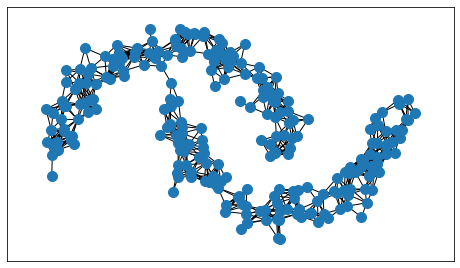

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

nx.draw_networkx_nodes(G, X, node_size=100, ax = ax)
nx.draw_networkx_edges(G, X, ax = ax)
ax.set_aspect('equal')

In [43]:
# compute Laplacian matrices 

d = np.sum(W, axis=1) # degree vector

D = np.diag(d)
Ds = np.diag(1/np.sqrt(d))
Di = np.diag(1/d)


L = D - W # unnormalized

Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized

In [44]:
# compute eigendecompositions 

ll, VV = np.linalg.eigh(L)

# we need to sort the eigenvalues and vectors 

idx = ll.argsort()
l = ll[idx]
V = VV[:, idx]

lln, VVn = np.linalg.eigh(Ln)

idxn = lln.argsort()
ln = lln[idxn]
Vn = VVn[:, idxn]

print(l[0:10])

print(ln[0:10])

[1.44863412e-16 5.58373464e-03 3.67794640e-02 4.30646612e-02
 1.48446922e-01 1.59560742e-01 3.18271327e-01 5.21084391e-01
 5.58970225e-01 6.36809592e-01]
[1.18126702e-16 5.10610982e-04 3.42988072e-03 3.97206951e-03
 1.42251635e-02 1.53187493e-02 2.75003561e-02 5.52888761e-02
 6.22288755e-02 6.81161890e-02]


Text(0, 0.5, '$log \\lambda$')

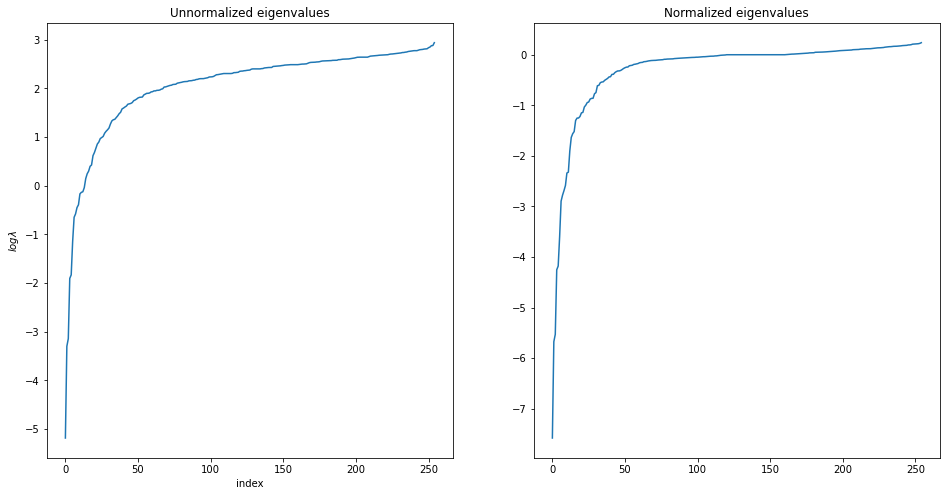

In [45]:
# plot eigenvalues 

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(np.log(l[1:None]))
ax[0].set_title('Unnormalized eigenvalues')
ax[0].set_xlabel('index')
ax[0].set_ylabel('$log \lambda$')


ax[1].plot(np.log(ln[1:None]))
ax[1].set_title('Normalized eigenvalues')
ax[0].set_xlabel('index')
ax[0].set_ylabel('$log \lambda$')

Then we also find the eigenvectors of Laplacian $\displaystyle \tilde{L}= \tilde{Q}\Lambda \tilde{Q}^T$. The first eigenvector is the ones, not useful. We then care about $Q_1, Q_2,...$

Text(0.5, 0.92, 'Normalized embedding')

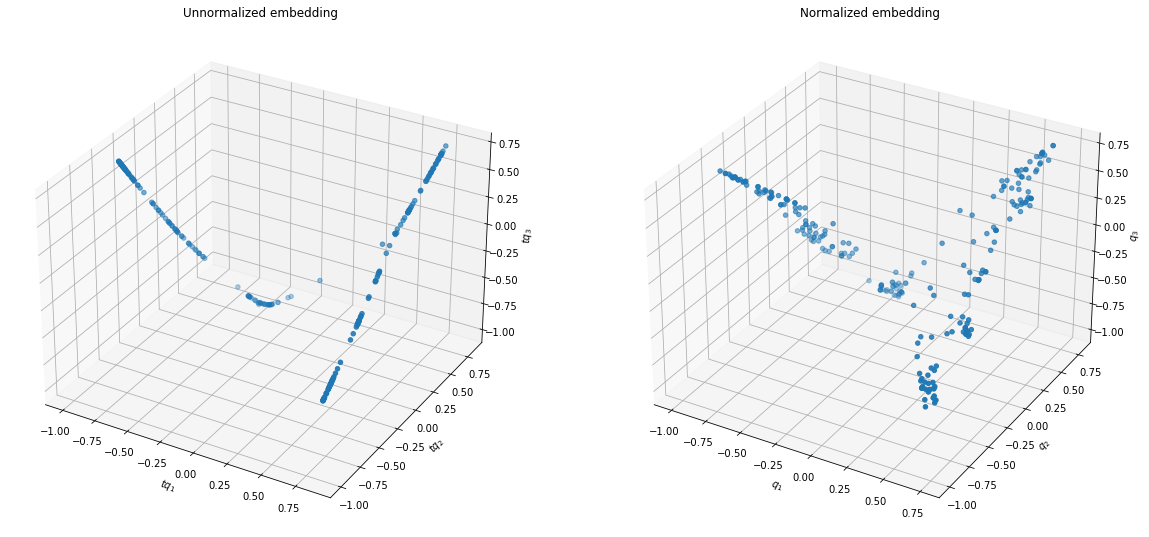

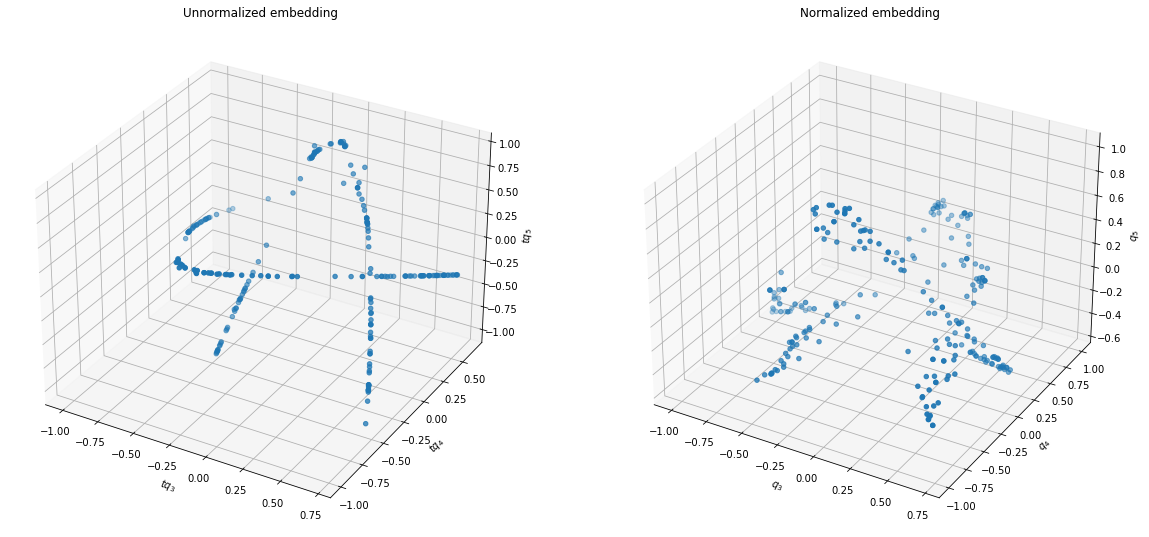

In [46]:
# 3D plot of Laplacian embedding with first three eigenvectors

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter( V[:,1]/np.abs(V[:,1]).max(), V[:,2]/np.abs(V[:,2]).max(), V[:,3]/np.abs(V[:,3]).max()  )
ax.set_xlabel('$tq_1$')
ax.set_ylabel('$tq_2$')
ax.set_zlabel('$tq_3$')
ax.set_title('Unnormalized embedding')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter( Vn[:,1]/np.abs(Vn[:,1]).max(), Vn[:,2]/np.abs(Vn[:,2]).max(), Vn[:,3]/np.abs(Vn[:,3]).max()  )
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$q_3$')
ax.set_title('Normalized embedding')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter( V[:,3]/np.abs(V[:,3]).max(), V[:,4]/np.abs(V[:,4]).max(), V[:,5]/np.abs(V[:,5]).max()  )
ax.set_xlabel('$tq_3$')
ax.set_ylabel('$tq_4$')
ax.set_zlabel('$tq_5$')
ax.set_title('Unnormalized embedding')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter( Vn[:,3]/np.abs(Vn[:,3]).max(), Vn[:,4]/np.abs(Vn[:,4]).max(), Vn[:,5]/np.abs(Vn[:,5]).max()  )
ax.set_xlabel('$q_3$')
ax.set_ylabel('$q_4$')
ax.set_zlabel('$q_5$')
ax.set_title('Normalized embedding')

Then we apply K-means method to cluster the data 

In [47]:
# apply K means on the embedded data, only the first M dimensions 

M = 2


FX = V[:, 1:M+1]

FX = FX / np.abs(FX).max(axis=0)

FXn = Vn[:, 1:M+1]

FXn = FXn / np.abs(FXn).max(axis=0)

In [48]:
import sklearn.cluster

KMM = skl.cluster.KMeans(n_clusters=2, random_state=0).fit(FX)

KMMn = skl.cluster.KMeans(n_clusters=2, random_state=0).fit(FXn)

Text(0.5, 1.0, 'SC with Normalized Laplacian')

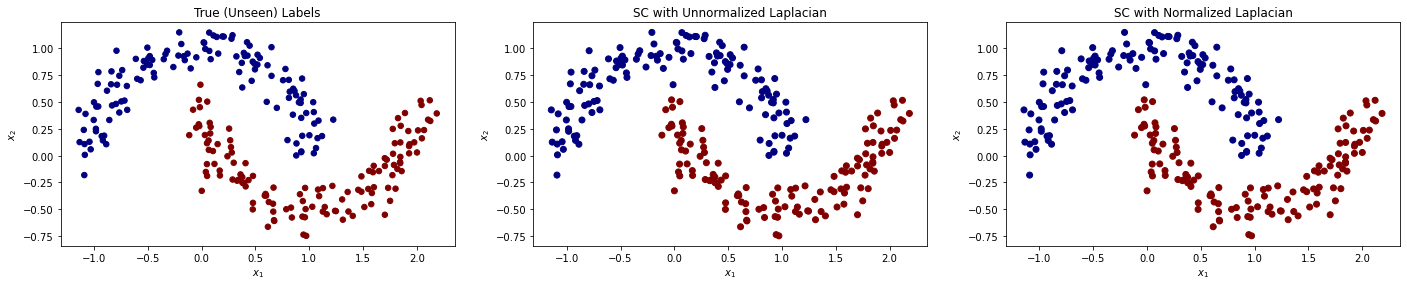

In [49]:
fig, ax = plt.subplots(1,3, figsize=(24,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='jet')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], c=KMM.labels_, cmap='jet')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('SC with Unnormalized Laplacian')

ax[2].scatter(X[:,0], X[:,1], c=KMMn.labels_, cmap='jet')
ax[2].set_aspect('equal')
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$x_2$')
ax[2].set_title('SC with Normalized Laplacian')

In summary, there are two key steps in SC.
\begin{enumerate}
\item Construct feature map (Laplacian embedding)
\item Cluster/classify the mapped data $F(X)$
\end{enumerate}

Sorting the eigenvalues then normalizing the eigenvectors is important.  

In fact the first eigenvector is always $q_0=\mathbf{1}$ so the second vector also know as the \textbf{Fiedler vector} has the form:
$$\tilde{q_1}= \left[
\begin{array}{ccc}
\mathbf{1}_{N_0}\\
\frac{-N_0}{N_1}\mathbf{1}_{N_1}
\end{array}
\right]$$
adjusted so that $q_0^Tq_1=0$, then the sign of $q_1$ becomes our main classifier.

### Spectral Gap heuristic for choosing K
If the graph is perfectly disconnected, the first few eigenvalues are just straight zeros, which can be seen in the plot of eigenvalues such that the gap between distinct eigenvalues are big.

However, in the case of not perfectly disconnected graph, we can still get similar results except that the first few eigenvalues are small but not zeros. We then see there is $n$ eigenvalues that are pretty close. We then see the ratio of the eigenvalues($\frac{\lambda_{j+1}}{\lambda_j}$). This method monitoring jump in eigenvalues is sometimes much efficient than the elbow method.
